In [1]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
import scripts.calc_grgrstar_funcs  as grfuncs

sns.set()

/home/aditya/Documents/SOMBL


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
length = 100
pattern = "altn_altupdown_updown"
# pattern = "alt_up_down"

In [4]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [5]:
def get_data(length, pattern):
    df = pd.read_csv(f"data/spin_imbalances_twoset_error_sample_L{length}_{pattern}.dat")
    complex_types = {
        'spin_up_imb_S_plus': complex,
        'spin_up_imb_S_minus': complex,
        'spin_up_imb_S_x': complex,
        'spin_up_imb_S_y': complex,
        'spin_up_imb_S_z': complex,
        'staggered_mag_z': complex,

        'spin_up_imb_S_plus_var': complex,
        'spin_up_imb_S_minus_var': complex,
        'spin_up_imb_S_x_var': complex,
        'spin_up_imb_S_y_var': complex,
        'spin_up_imb_S_z_var': complex,
        'staggered_mag_z_var': complex,
    }
    df = df.astype(complex_types)
    return df

In [6]:
df100 = get_data(100, pattern)

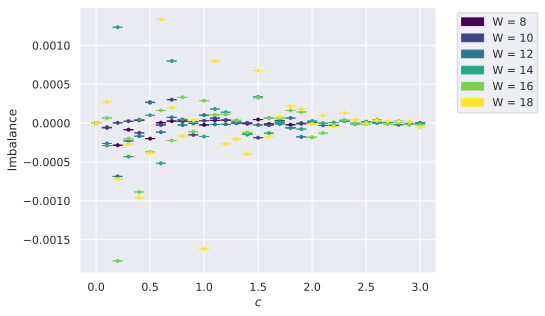

In [7]:
lengths = [30, 60, 100]
cmap = plt.cm.viridis
# couplings = [0, 0.5, 1, 1.5, 2, 2.5, 3.0]
disorders = [8, 10, 12, 14, 16, 18]
colors = cmap(np.linspace(0, 1, len(disorders)))

# for i in range(3):
df = df100
length = lengths[2]

# value = "staggered_mag_z"
value = "spin_up_imb_S_z"
# value = "spin_up_imb_charge"

for i in range(len(disorders)):  
    # coupling = couplings[i]
    disorder = disorders[i]
    data = df.loc[np.isclose(df["disorder"], disorder)]
    x = np.array(data["coupling"])
    # y = (np.real(data["spin_up_imb_S_z"]) - np.real(data30["spin_up_imb_S_z"])) / np.real(data30["spin_up_imb_S_z"])
    y = np.real(data[value])
    yerr = np.real(data[value + "_var"])
    labels = data["disorder"]
    cmap = plt.cm.viridis
    for j in range(len(x)):
        plt.errorbar(x[j], y[j], yerr=yerr[j], linestyle="", marker=".",
                     color=colors[i], capsize=5, label=f"L = {length}")

# plt.yscale()
# plt.title(r"$c = $" + f"{disorder}")
# plt.yscale("log")
plt.ylabel("Imbalance")
plt.xlabel(r"$c$")

handles = []
for i in range(len(disorders)):
    handles.append(mpl.patches.Patch(color=colors[i], label=f"W = {disorders[i]}"))
plt.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")

In [8]:
setPlus = []
setMinus = []
for x in range(60):
    for y in range(60):
        if ((x + y) % 4 == 0):
            setPlus.append(x + y*60)
        elif ((x + y) % 2 == 0):
            setMinus.append(x + y*60)
        else:
            continue


In [9]:
for x in range(10):
    for y in range(10):
        index = x + 60*y
        if index in setPlus:
            print("+ ", end="")
            continue
        if index in setMinus:
            print("- ", end="")
            continue
        print("H ", end="")
    print()


+ H - H + H - H + H 
H - H + H - H + H - 
- H + H - H + H - H 
H + H - H + H - H + 
+ H - H + H - H + H 
H - H + H - H + H - 
- H + H - H + H - H 
H + H - H + H - H + 
+ H - H + H - H + H 
H - H + H - H + H - 


In [10]:
density, density_vars = grfuncs.get_densities(60, 0, 18, -1, pattern)

In [11]:
n_up, n_down, S_plus, S_minus = density

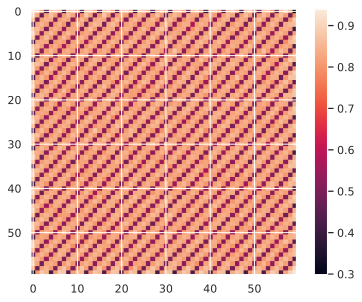

In [12]:
plt.imshow(n_up)
plt.colorbar()

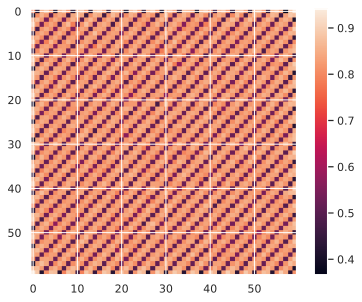

In [13]:
plt.imshow(n_down)
plt.colorbar()

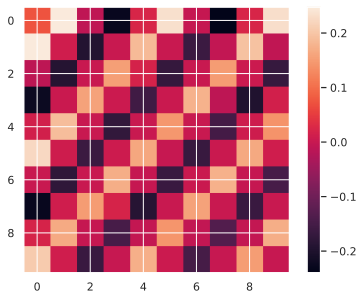

In [14]:
S_z = (n_up-n_down)/2
plt.imshow(S_z[:10,:10])
plt.colorbar()

In [15]:
mag = 0
for index in setPlus:
    x = index % 60
    y = index // 60
    mag += S_z[x, y]

norm = 60 * 60 / 4
    
print(mag / norm)

0.0001037589722222217


In [16]:
mag = 0
for index in setMinus:
    x = index % 60
    y = index // 60
    mag -= S_z[x, y]
norm = 60 * 60 / 4
print(mag / norm)

6.810669444444424e-05


In [17]:
print(np.sum(S_z) * 2/ (60 * 60))

-4.119901259722614e-06


In [18]:
mag = 0
for x in range(60):
    for y in range(60):
        if (x + y) % 2 == 0:
            mag += S_z[x, y]
        else:
            mag -= S_z[x, y]
print(mag / (60 * 60))

1.9886089518749915e-05
